In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:
path = "/content/drive/MyDrive/MP-2/archive/UNSW_NB15_training-set.csv"   # change as needed
df = pd.read_csv(path)


In [4]:
print("Missing values:", df.isnull().sum().sum())



Missing values: 0


In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [6]:
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [7]:
target_col = "label"        # or "attack_cat"

X = df.drop(target_col, axis=1)
y = df[target_col]


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
X_scaled.to_csv("/content/drive/MyDrive/UNSW_X_preprocessed.csv", index=False)
y.to_csv("/content/drive/MyDrive/UNSW_y.csv", index=False)

print("Preprocessing DONE!")


Preprocessing DONE!


In [ ]:
!pip install seaborn matplotlib scikit-learn


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import numpy as np


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


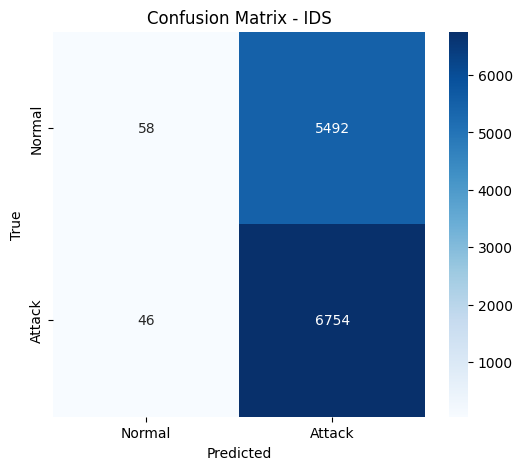

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Attack"],
            yticklabels=["Normal", "Attack"])
plt.title("Confusion Matrix - IDS")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


386/386 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


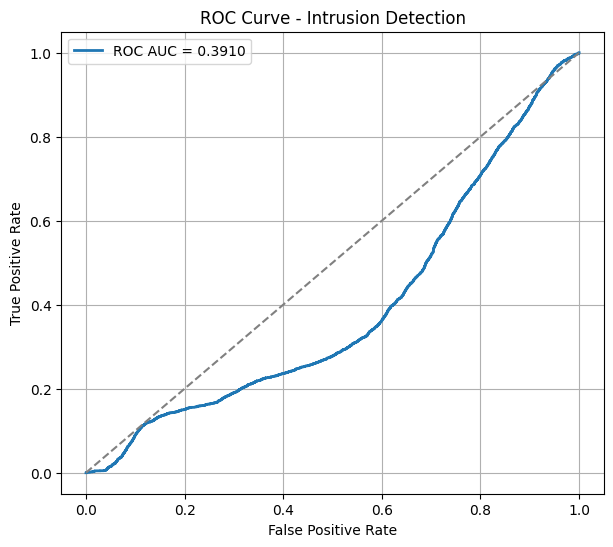

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
pred_probs = global_model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, lw=2, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Intrusion Detection")
plt.legend()
plt.grid(True)
plt.show()


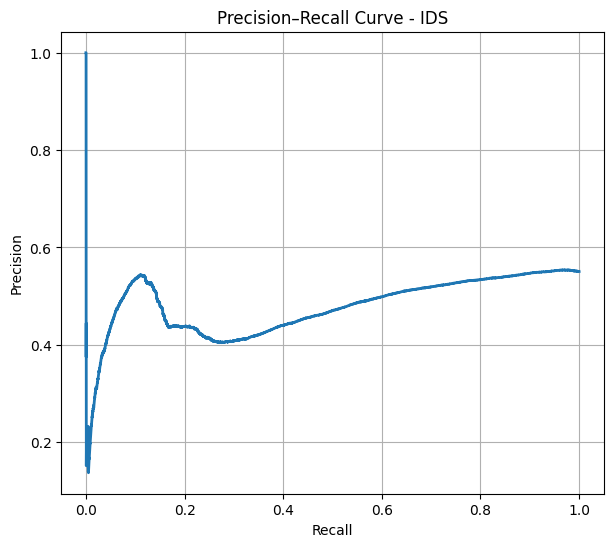

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_probs[:,1])

plt.figure(figsize=(7,6))
plt.plot(recall, precision, lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - IDS")
plt.grid(True)
plt.show()


/tmp/ipython-input-2362512279.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=preds, palette="viridis")
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


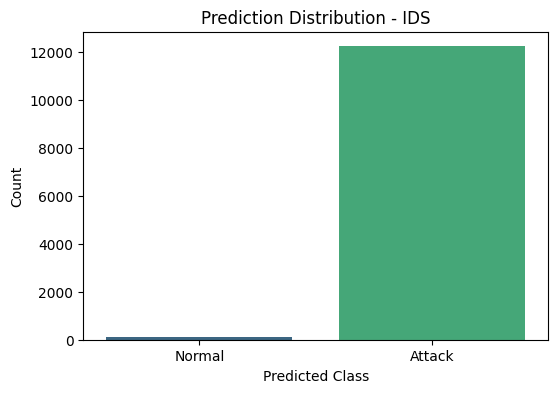

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=preds, palette="viridis")
plt.xticks([0,1], ["Normal", "Attack"])
plt.title("Prediction Distribution - IDS")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-2518185046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=results_df["action"], palette="magma")
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


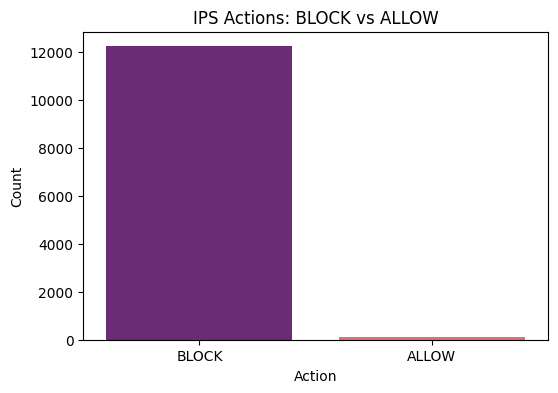

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=results_df["action"], palette="magma")
plt.title("IPS Actions: BLOCK vs ALLOW")
plt.xlabel("Action")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-2673397302.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=attack_df["action"], palette="coolwarm")
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


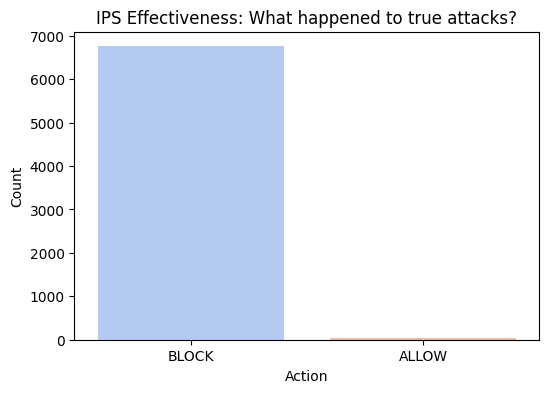

In [ ]:
attack_df = results_df[results_df["true"] == 1]  # only attack samples

plt.figure(figsize=(6,4))
sns.countplot(x=attack_df["action"], palette="coolwarm")
plt.title("IPS Effectiveness: What happened to true attacks?")
plt.xlabel("Action")
plt.ylabel("Count")
plt.show()


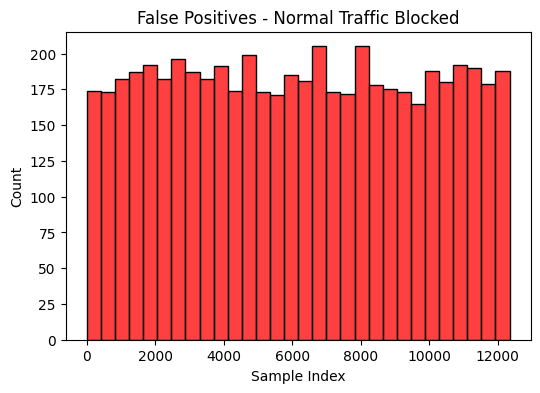

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
fp_df = results_df[(results_df["true"] == 0) & (results_df["pred"] == 1)]

plt.figure(figsize=(6,4))
sns.histplot(fp_df.index, bins=30, color="red")
plt.title("False Positives - Normal Traffic Blocked")
plt.xlabel("Sample Index")
plt.ylabel("Count")
plt.show()


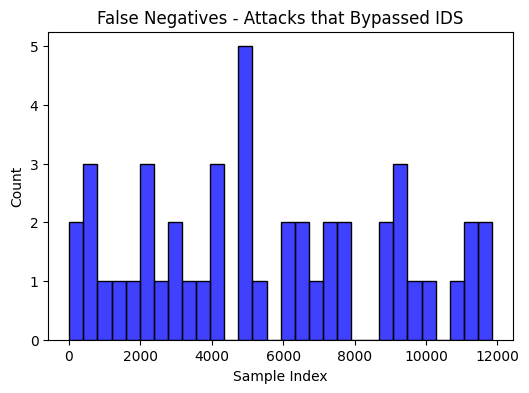

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
fn_df = results_df[(results_df["true"] == 1) & (results_df["pred"] == 0)]

plt.figure(figsize=(6,4))
sns.histplot(fn_df.index, bins=30, color="blue")
plt.title("False Negatives - Attacks that Bypassed IDS")
plt.xlabel("Sample Index")
plt.ylabel("Count")
plt.show()
